<a href="https://colab.research.google.com/github/anneaiad/Challenge_Telecom_X_Alura/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [47]:
import pandas as pd

In [48]:
#Extrair os dados do API
dados = pd.read_json('/content/TelecomX_Data.json')
dados


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


# 🔧 Transformação de Dados

In [49]:
#Verificar nomes das colunas, valores nulos e tipo de dados a serem tratados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [50]:
#Definir a lista de colunas aninhadas a serem tratadas
colunas = ['customer', 'phone', 'internet', 'account']

In [51]:
#Normalizar as colunas aninhadas
df_expandido = dados.copy()

for col in colunas:
    normalizado = pd.json_normalize(df_expandido[col])
    normalizado.columns = [f"{col}_{sub}" for sub in normalizado.columns]
    df_expandido = pd.concat([df_expandido.drop(columns=[col]), normalizado], axis=1)

In [52]:
df_expandido.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [53]:
df = df_expandido
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [54]:
#Salvar uma cópia do df para CSV
df.to_csv('df_normalizado.csv', index=False)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [56]:
for col in df.columns:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print()

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
['No' 'Yes' '']

Coluna: customer_gender
['Female' 'Male']

Coluna: customer_SeniorCitizen
[0 1]

Coluna: customer_Partner
['Yes' 'No']

Coluna: customer_Dependents
['Yes' 'No']

Coluna: customer_tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Coluna: phone_PhoneService
['Yes' 'No']

Coluna: phone_MultipleLines
['No' 'Yes' 'No phone service']

Coluna: internet_InternetService
['DSL' 'Fiber optic' 'No']

Coluna: internet_OnlineSecurity
['No' 'Yes' 'No internet service']

Coluna: internet_OnlineBackup
['Yes' 'No' 'No internet service']

Coluna: internet_DeviceProtection
['No' 'Yes' 'No internet service']

Coluna: internet_TechSupport
['Yes' 'No' 'No internet service']

Coluna: internet_Stre

In [57]:
import numpy as np

In [58]:
#Tratar string vazia como NaN
df['Churn'] = df['Churn'].replace('', np.nan)


In [59]:
#Remover as linhas NaN para transformar a coluna em tipo bool
df = df.dropna(subset=['Churn'])
df.reset_index(inplace=True, drop=True)


In [60]:
#Listar todas as colunas de "sim" ou "não" para transformar em tipo bool
colunas_sim_nao = ['Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling']
colunas_sim_nao

['Churn',
 'customer_Partner',
 'customer_Dependents',
 'phone_PhoneService',
 'account_PaperlessBilling']

In [61]:
#Usar o map e o dicionário para transformar as palavras "Yes" e "No" em "True" ou "False"
for col in colunas_sim_nao:
    df[col] = df[col].map({'Yes': True, 'No': False})

/tmp/ipython-input-446459681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'Yes': True, 'No': False})
/tmp/ipython-input-446459681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'Yes': True, 'No': False})
/tmp/ipython-input-446459681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [62]:
print(df.dtypes)


customerID                    object
Churn                           bool
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner                bool
customer_Dependents             bool
customer_tenure                int64
phone_PhoneService              bool
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling        bool
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total         object
dtype: object


In [63]:
#Transformar os dados 0 e 1 em Falso ou True
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].map({0:False, 1:True})

/tmp/ipython-input-3777225341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].map({0:False, 1:True})


In [64]:
#Transformar a coluna customer_SeniorCitizen para o tipo bool
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype(bool)


/tmp/ipython-input-4007585460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype(bool)


In [65]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.3
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.4
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.4


In [66]:
print(df.dtypes)


customerID                    object
Churn                           bool
customer_gender               object
customer_SeniorCitizen          bool
customer_Partner                bool
customer_Dependents             bool
customer_tenure                int64
phone_PhoneService              bool
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling        bool
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total         object
dtype: object


In [67]:
#Verificar se tem "," na coluna account_Charges.Total pois se trata de um dataFrame de língua inglesa
df['account_Charges.Total'].str.contains(',').sum()

np.int64(0)

In [68]:
#Transformar a coluna em numérica
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')


/tmp/ipython-input-1149699027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')


In [69]:
#Transformar para float
df['account_Charges.Total'] = df['account_Charges.Total'].astype(float)

/tmp/ipython-input-2436792186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account_Charges.Total'] = df['account_Charges.Total'].astype(float)


In [70]:
print(df.dtypes)


customerID                    object
Churn                           bool
customer_gender               object
customer_SeniorCitizen          bool
customer_Partner                bool
customer_Dependents             bool
customer_tenure                int64
phone_PhoneService              bool
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling        bool
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total        float64
dtype: object


In [71]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


#📊 Carga e análise

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#Verificar quantos clientes saíram e quantos ficaram
print(df['Churn'].value_counts())


Churn
False    5174
True     1869
Name: count, dtype: int64


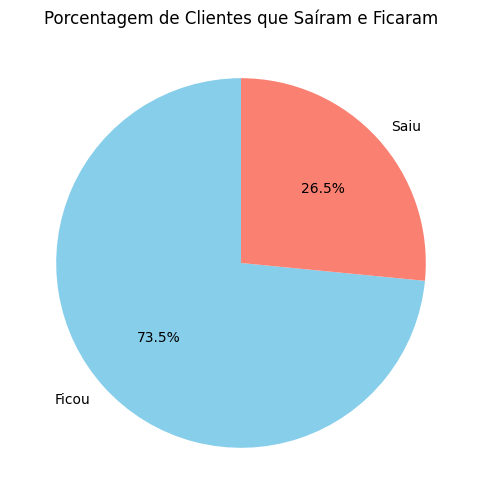

In [135]:
import matplotlib.pyplot as plt

# Contar quantos clientes saíram e ficaram
contagem = df['Churn'].value_counts()

# Definir labels e cores
labels = ['Ficou', 'Saiu']
cores = ['skyblue', 'salmon']

# Criar o gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(contagem, labels=labels, colors=cores, autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Clientes que Saíram e Ficaram')

plt.savefig("grafico_pizza_total_clientes_churn.png")
plt.show()


In [89]:
#Criar uma nova coluna com os valores gastos diários
df['account_Charges.Daily'] = df['account_Charges.Monthly'] / 30
df.head()

/tmp/ipython-input-3294353655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account_Charges.Daily'] = df['account_Charges.Monthly'] / 30


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,account_Charges.Daily
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


In [98]:
desc_numerico = df.describe().T


In [101]:
desc_numerico['std'] = df.std(numeric_only=True)

In [102]:
desc_numerico['median'] = df.median(numeric_only=True)

In [100]:
desc_numerico = desc_numerico[['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]

print("Estatísticas Descritivas - Numéricas")
print(desc_numerico)

Estatísticas Descritivas - Numéricas
                                mean    median          std        min  \
customer_tenure            32.371149    29.000    24.559481   0.000000   
account_Charges.Monthly    64.761692    70.350    30.090047  18.250000   
account_Charges.Total    2283.300441  1397.475  2266.771362  18.800000   
account_Charges.Daily       2.158723     2.345     1.003002   0.608333   

                                25%       50%        75%          max  
customer_tenure            9.000000    29.000    55.0000    72.000000  
account_Charges.Monthly   35.500000    70.350    89.8500   118.750000  
account_Charges.Total    401.450000  1397.475  3794.7375  8684.800000  
account_Charges.Daily      1.183333     2.345     2.9950     3.958333  


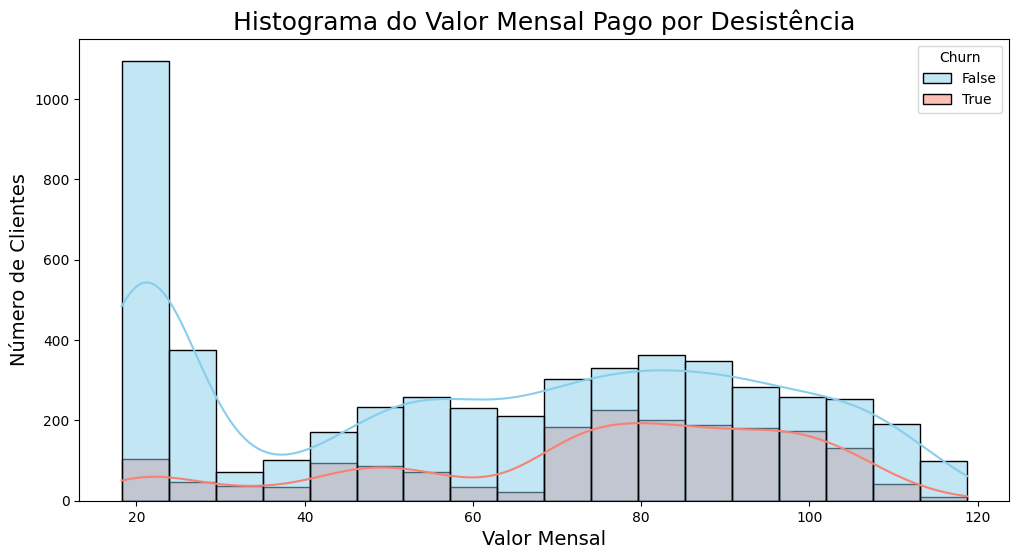

In [139]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df, x='account_Charges.Monthly', hue='Churn', kde=True,
             palette={False:'skyblue', True:'salmon'}, alpha=0.5)
plt.title('Histograma do Valor Mensal Pago por Desistência', fontsize=18)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xlabel('Valor Mensal', fontsize=14)
plt.savefig("Histograma_Valor_Mensal_churn.png")
plt.show()


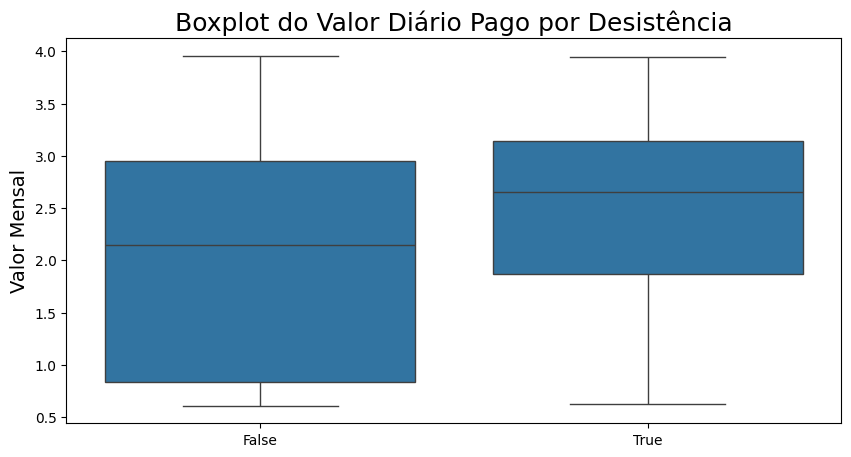

In [138]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Churn', y='account_Charges.Daily', data=df)
plt.title('Boxplot do Valor Diário Pago por Desistência', fontsize=18)
plt.ylabel('Valor Mensal', fontsize=14)
plt.xlabel('')
plt.savefig("Boxplot_Valor_Diário_churn.png")
plt.show()


In [75]:
print(df.groupby('account_PaymentMethod')['Churn'].value_counts())


account_PaymentMethod      Churn
Bank transfer (automatic)  False    1286
                           True      258
Credit card (automatic)    False    1290
                           True      232
Electronic check           False    1294
                           True     1071
Mailed check               False    1304
                           True      308
Name: count, dtype: int64


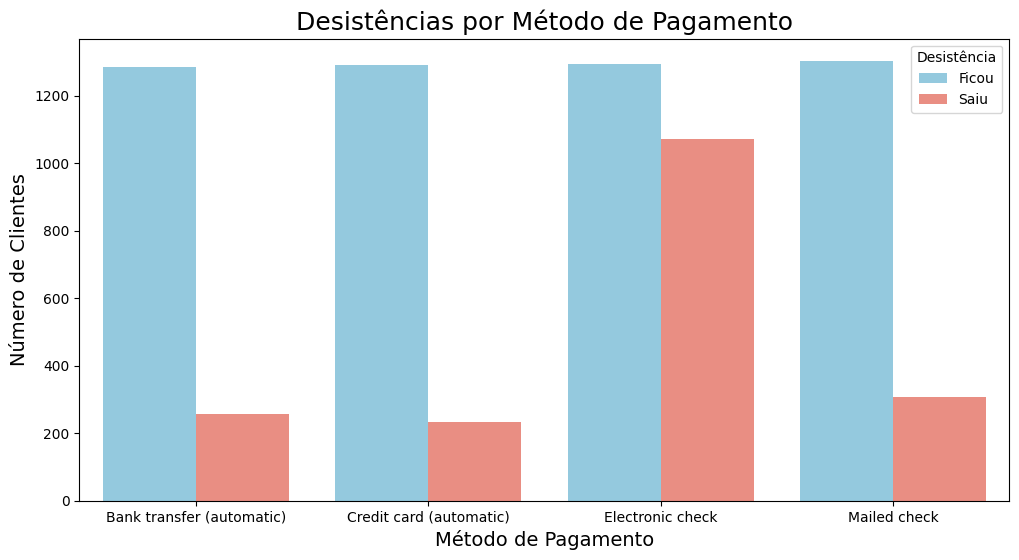

In [140]:
#Criar um gráfico de barras agrupadas para melhor vizualização dos dados
plt.figure(figsize=(12,6))
ax = sns.barplot(x='account_PaymentMethod', y='counts', hue='Churn', data=churn_metodo_pagamento, palette=palette)

handles, labels = ax.get_legend_handles_labels()
labels = ['Ficou', 'Saiu']
plt.legend(handles, labels, title='Desistência')

plt.title('Desistências por Método de Pagamento', fontsize=18)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xlabel('Método de Pagamento', fontsize=14)
plt.savefig("grafico_Desistências_Método_Pagamento_churn.png")
plt.show()


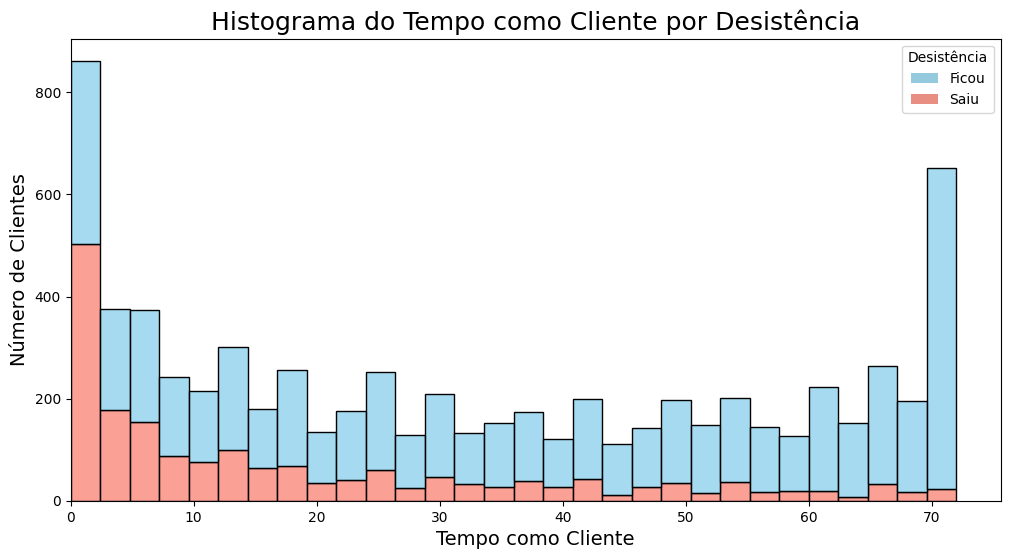

In [141]:
palette = {False: "skyblue", True: "salmon"}
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='customer_tenure', hue='Churn', multiple='stack', bins=30, palette=palette)
plt.title('Histograma do Tempo como Cliente por Desistência', fontsize=18)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xlabel('Tempo como Cliente', fontsize=14)
plt.xlim(left=0)

handles, labels = ax.get_legend_handles_labels()
labels = ['Ficou', 'Saiu']
plt.legend(handles, labels, title='Desistência')
plt.savefig("Histograma_Tempo_Cliente_churn.png")
plt.show()


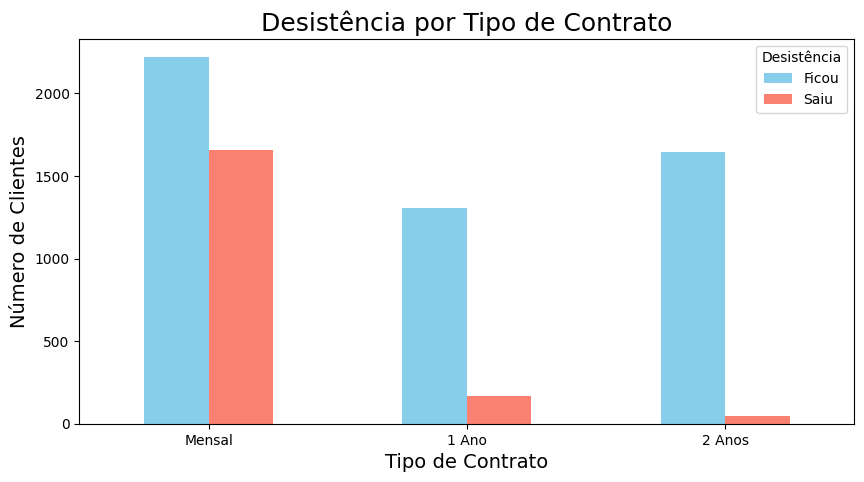

In [142]:
churn_contrato = df.groupby(['account_Contract', 'Churn']).size().unstack()

churn_contrato.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(10,5))
plt.title('Desistência por Tipo de Contrato', fontsize=18)
plt.xlabel('Tipo de Contrato', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.legend(title='Desistência', labels=['Ficou', 'Saiu'])
plt.xticks(ticks=[0, 1, 2], labels=['Mensal', '1 Ano', '2 Anos'])
plt.xticks(rotation=0)
plt.savefig("grafico_Desistência_Tipo_Contrato.png")
plt.show()




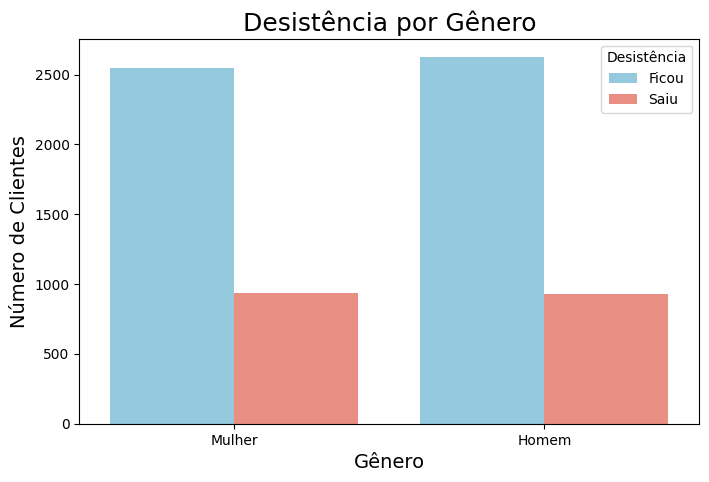

In [143]:
plt.figure(figsize=(8,5))
sns.countplot(x='customer_gender', hue='Churn', data=df, palette=palette)
plt.title('Desistência por Gênero', fontsize=18)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.legend(title='Desistência', labels=['Ficou', 'Saiu'])
plt.xticks(ticks=[0, 1], labels=['Mulher', 'Homem'])
plt.savefig("grafico_Desistência_Gênero.png")
plt.show()

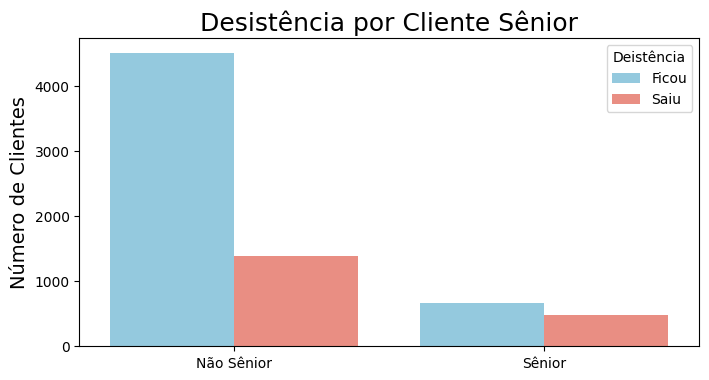

In [144]:
plt.figure(figsize=(8,4))
sns.countplot(x='customer_SeniorCitizen', hue='Churn', data=df, palette=palette)
plt.title('Desistência por Cliente Sênior', fontsize=18)
plt.xlabel('')
plt.ylabel('Número de Clientes', fontsize=14)
plt.legend(title='Deistência', labels=['Ficou', 'Saiu'])
plt.xticks(ticks=[0, 1], labels=['Não Sênior', 'Sênior'])
plt.savefig("grafico_Desistência_Senior.png")
plt.show()

In [82]:
col_servicos_sim_nao = ['phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

In [83]:
df_servicos = df[col_servicos_sim_nao].copy()


In [84]:
for col in col_servicos_sim_nao:
    df_servicos[col] = df_servicos[col].replace({
        'Yes': True,
        'No': False,
        'No internet service': False,
        'No phone service': False,
        'Fiber optic': True,
        'DSL': True
    }).infer_objects()

/tmp/ipython-input-384879429.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_servicos[col] = df_servicos[col].replace({


In [85]:
df_servicos['qtd_servicos'] = df_servicos.sum(axis=1)



In [86]:
df_servicos['Churn'] = df['Churn']



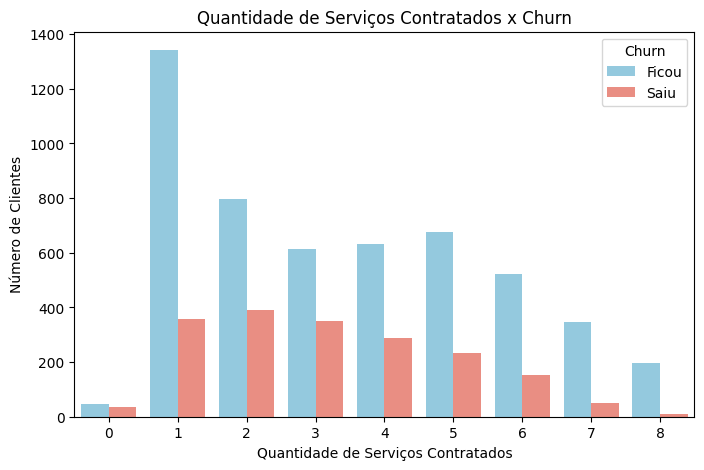

In [145]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='qtd_servicos', hue='Churn', data=df_servicos, palette={False:'skyblue', True:'salmon'})
plt.title('Quantidade de Serviços Contratados x Churn')
plt.xlabel('Quantidade de Serviços Contratados')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Ficou', 'Saiu'])
plt.savefig("grafico_Quantidade_Serviços_Contratados_churn.png")
plt.show()

#📄Relatorio Final

Relatório de Análise de Desistencia/Churn de Clientes
**bold text**
1. Introdução

Objetivo:
O objetivo desta análise é identificar padrões e fatores que influenciam a evasão de clientes na empresa Telecom X, utilizando uma base de dados de uma API, aplicando os conhecimentos em ETL aprendidos.

Objetivo didático:
- Importar e manipular dados de uma API de forma eficiente.
- Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados.
- Criar visualizações de dados estratégicas para identificar padrões e tendências.
- Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.

2. Extração de dados:

Arquivo importado de uma API no formato JSON.
Bibliotecas utilizadas: pandas, numpy, matplotlib, seaborn.

3. Tratamentos realizados:

Padronização de colunas. Normalização de dados aninhados.

Conversão de valores categóricos para facilitar análise.

Criação de nova tabela com valores diário pago para ajudar na estatística descritiva numérica.

Remoção de valores ausentes ou inconsistentes.

4. Análise Exploratória de Dados
Principais análises realizadas:

Distribuição geral do churn:
Quantidade de Clientes/Churn
Ficaram:    5174
Saíram:     1869

Gráfico de pizza mostrando proporção de clientes que ficaram e saíram.
De acordo com o gráfico podemos observar que o número de clientes que saíram corresponde a 27% do total de clientes.

Histograma Desistencia/Churn por valor mensal pago: podemos observar que a maior concentração de desistência está nos valores pagos mensais entre 70 e 100

Boxplot do Valor Diário Pago por Desistência: podemos observar que os índices de desistência/churn estão localizados no maior valor diário.

Gráfico de barras agrupadas Desistência/Churn por método de pagamento: no gráfico podemos observar que a maior quantidade de desistência está concentrado no método de pagamento 'Eletronic check' (cheque eletrônico ou eCheck).

Histograma de Desistencia/Churn por tempo de cliente (tenure): no histograma podemos observar que os maiores índices de churn estão nos clientes mais novos com menos de 10 meses de contrato.

Gráfico de barras agrupadas Desistência/Churn por tipo de contrato: confirmando a análise do Histograma de Desistencia/Churn por tempo de cliente (tenure), o número de desistência para contratos do tipo Mensal é expressivamente superior ao contrato de 1 Ano ou 2 Anos.

Gráfico de barras agrupadas de Desistencia/Churn por gênero: a diferença de desistência entre homem e mulher é inexpressiva.

Gráfico de barras agrupadas de Desistencia/Churn por Cliente Sênior: a quantidade de desistência se concentra nos clientes não sênior.

Gráfico de barras agrupadas de Desistencia/Churn por quantidade de serviços contratados: podemos verificar que quanto mais serviços contratados menor o índice de desistência/churn.

5. Resumo e conclusão

A análise revelou que aproximadamente 27% dos clientes saíram, indicando um índice significativo de evasão.

Observou-se que a maior concentração de desistências está entre clientes que pagam mensalidades na faixa de 70 a 100, e que aqueles com maior valor diário pago apresentam também índices mais elevados de churn, sugerindo que clientes com gastos mais altos podem estar mais propensos a cancelar.

O método de pagamento "Electronic check" ou eCheck foi identificado como o mais associado a desistências, o que indica uma possível vulnerabilidade ou insatisfação relacionada a essa forma de pagamento.

Clientes com menos de 10 meses de contrato apresentam maior risco de churn, reforçando a importância da retenção nos primeiros meses de relacionamento. Contratos mensais têm taxas de churn significativamente superiores aos contratos anuais ou bienais, evidenciando que planos de maior prazo favorecem a fidelização.

Não foram encontradas diferenças relevantes entre gêneros, mas entre clientes sênior e não sênior o churn é maior em clientes mais jovens, o que pode indicar a maior facilidade de cancelamento ou mudança de serviço, uma vez que pessoas mais jovens tem maior acesso a novidades no mercado, principalmente através da internet.

Por fim, foi constatado que a quantidade de serviços contratados está inversamente relacionada à evasão, ou seja, quanto mais serviços o cliente possui, menor a chance dele cancelar.

6. Recomendações:

Focar em estratégias de retenção para clientes novos: implementar programas de boas-vindas, benefícios ou descontos nos primeiros 10 meses para aumentar a fidelização.

Revisar e otimizar o processo relacionado ao método de pagamento "Electronic check": identificar possíveis falhas, atrasos ou dificuldades que possam gerar insatisfação e aumentar o risco de churn.

Incentivar planos de contratos de maior prazo: oferecer vantagens para migração de contratos mensais para anuais ou bienais, promovendo maior estabilidade na base de clientes.

Criar pacotes e promoções para ampliar o número de serviços contratados por cliente: já que mais serviços estão associados a menor churn, estimular o cross-selling pode aumentar o engajamento e reduzir a evasão.

Monitorar clientes de maior gasto diário: identificar possíveis causas de insatisfação e criar canais de atendimento prioritário para esses clientes, buscando reduzir cancelamentos.

